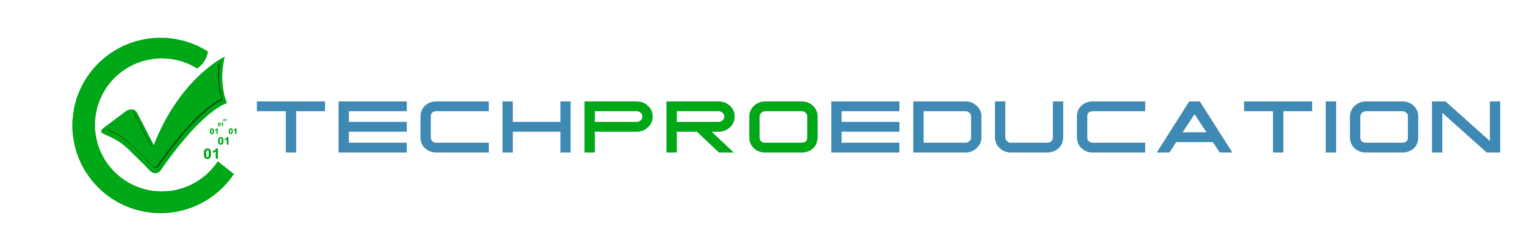

# Hand Written Digits Project

Data reference link : https://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits

# Exploratory Data Analysis and Visualization

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from yellowbrick.classifier import ROCAUC

from sklearn.svm import SVC
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [38]:
df = pd.read_csv("pendigits_txt.csv")

In [39]:
df.head()

input1  input2  input3  input4  input5  input6  input7  input8  input9  \
0      47     100      27      81      57      37      26       0       0   
1       0      89      27     100      42      75      29      45      15   
2       0      57      31      68      72      90     100     100      76   
3       0     100       7      92       5      68      19      45      86   
4       0      67      49      83     100     100      81      80      60   

   input10  input11  input12  input13  input14  input15  input16  class  
0       23       56       53      100       90       40       98      8  
1       15       37        0       69        2      100        6      2  
2       75       50       51       28       25       16        0      1  
3       34      100       45       74       23       67        0      4  
4       60       40       40       33       20       47        0      1

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10992 entries, 0 to 10991
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   input1   10992 non-null  int64
 1   input2   10992 non-null  int64
 2   input3   10992 non-null  int64
 3   input4   10992 non-null  int64
 4   input5   10992 non-null  int64
 5   input6   10992 non-null  int64
 6   input7   10992 non-null  int64
 7   input8   10992 non-null  int64
 8   input9   10992 non-null  int64
 9   input10  10992 non-null  int64
 10  input11  10992 non-null  int64
 11  input12  10992 non-null  int64
 12  input13  10992 non-null  int64
 13  input14  10992 non-null  int64
 14  input15  10992 non-null  int64
 15  input16  10992 non-null  int64
 16  class    10992 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


In [41]:
df.describe().T

count       mean        std  min   25%   50%    75%    max
input1   10992.0  38.814320  34.257783  0.0   6.0  32.0   65.0  100.0
input2   10992.0  85.120269  16.218571  0.0  76.0  89.0  100.0  100.0
input3   10992.0  40.605622  26.342984  0.0  20.0  40.0   58.0  100.0
input4   10992.0  83.774199  19.163646  0.0  72.0  91.0  100.0  100.0
input5   10992.0  49.770378  34.100515  0.0  18.0  53.0   78.0  100.0
input6   10992.0  65.573144  26.996688  0.0  49.0  71.0   86.0  100.0
input7   10992.0  51.220251  30.576881  0.0  28.0  53.5   74.0  100.0
input8   10992.0  44.498999  29.906104  0.0  23.0  43.0   64.0  100.0
input9   10992.0  56.868541  34.135530  0.0  29.0  60.0   89.0  100.0
input10  10992.0  33.695961  27.251548  0.0   7.0  33.0   54.0  100.0
input11  10992.0  60.516376  37.288086  0.0  23.0  73.0   97.0  100.0
input12  10992.0  34.826510  27.119982  0.0  11.0  30.0   55.0  100.0
input13  10992.0  55.022289  22.335539  0.0  42.0  53.0   68.0  100.0
input14  10992.0  34.937045  33.155463  0.0   5.0  27.0   47.0  100.0
input15  10992.0  47.287482  41.760400  0.0   0.0  40.0  100.0  100.0
input16  10992.0  28.845342  35.778094  0.0   0.0   9.0   51.0  100.0
class    10992.0   4.431587   2.876947  0.0   2.0   4.0    7.0    9.0

In [42]:
df["class"].value_counts()

2    1144
4    1144
1    1143
0    1143
7    1142
6    1056
8    1055
5    1055
9    1055
3    1055
Name: class, dtype: int64

In [43]:
df.shape

(10992, 17)

In [44]:
df.duplicated().sum()

0

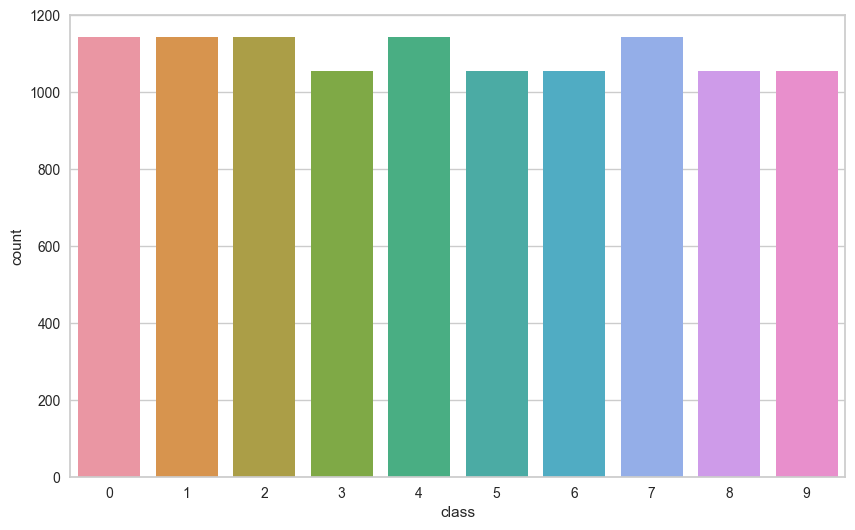

In [45]:
sns.countplot(x="class", data = df);

In [46]:
# plt.figure(figsize=(12,6))
# sns.pairplot(df, hue='class', palette='Dark2');

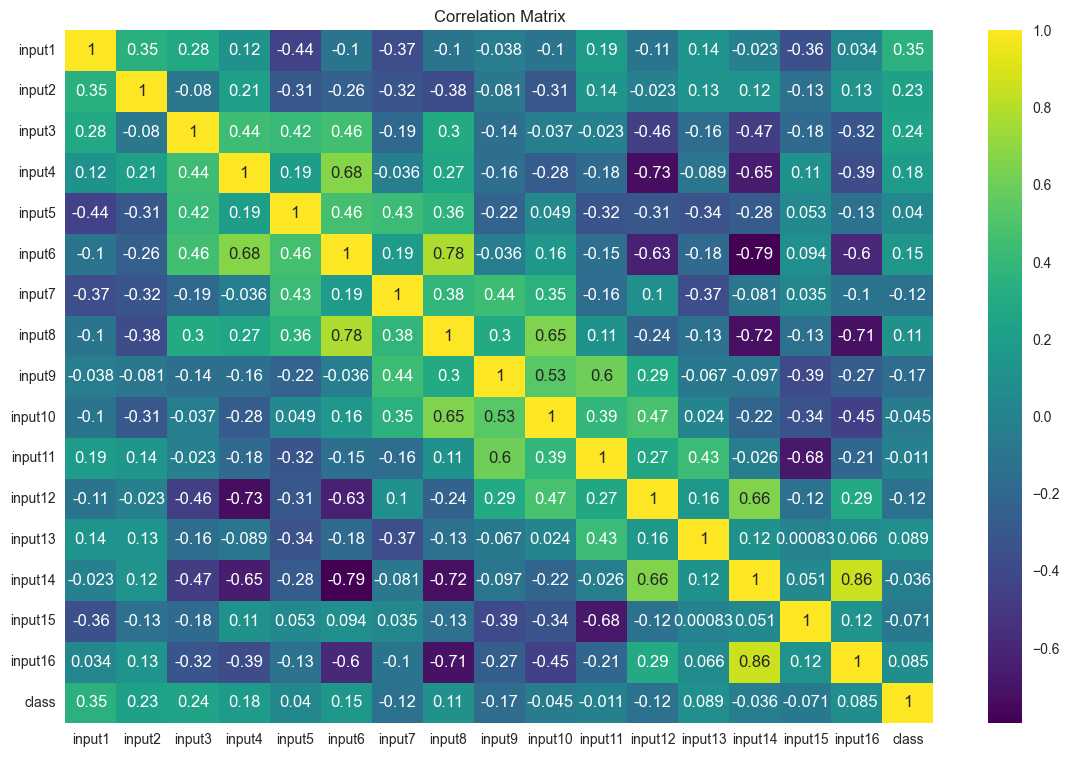

In [47]:
plt.figure(figsize=(14,9))
sns.heatmap(df.select_dtypes("number").corr(),annot=True, cmap='viridis')
plt.title("Correlation Matrix")

plt.show()

In [48]:
for i in df.columns:
    fig = px.box(df, x=i)
    fig.show()

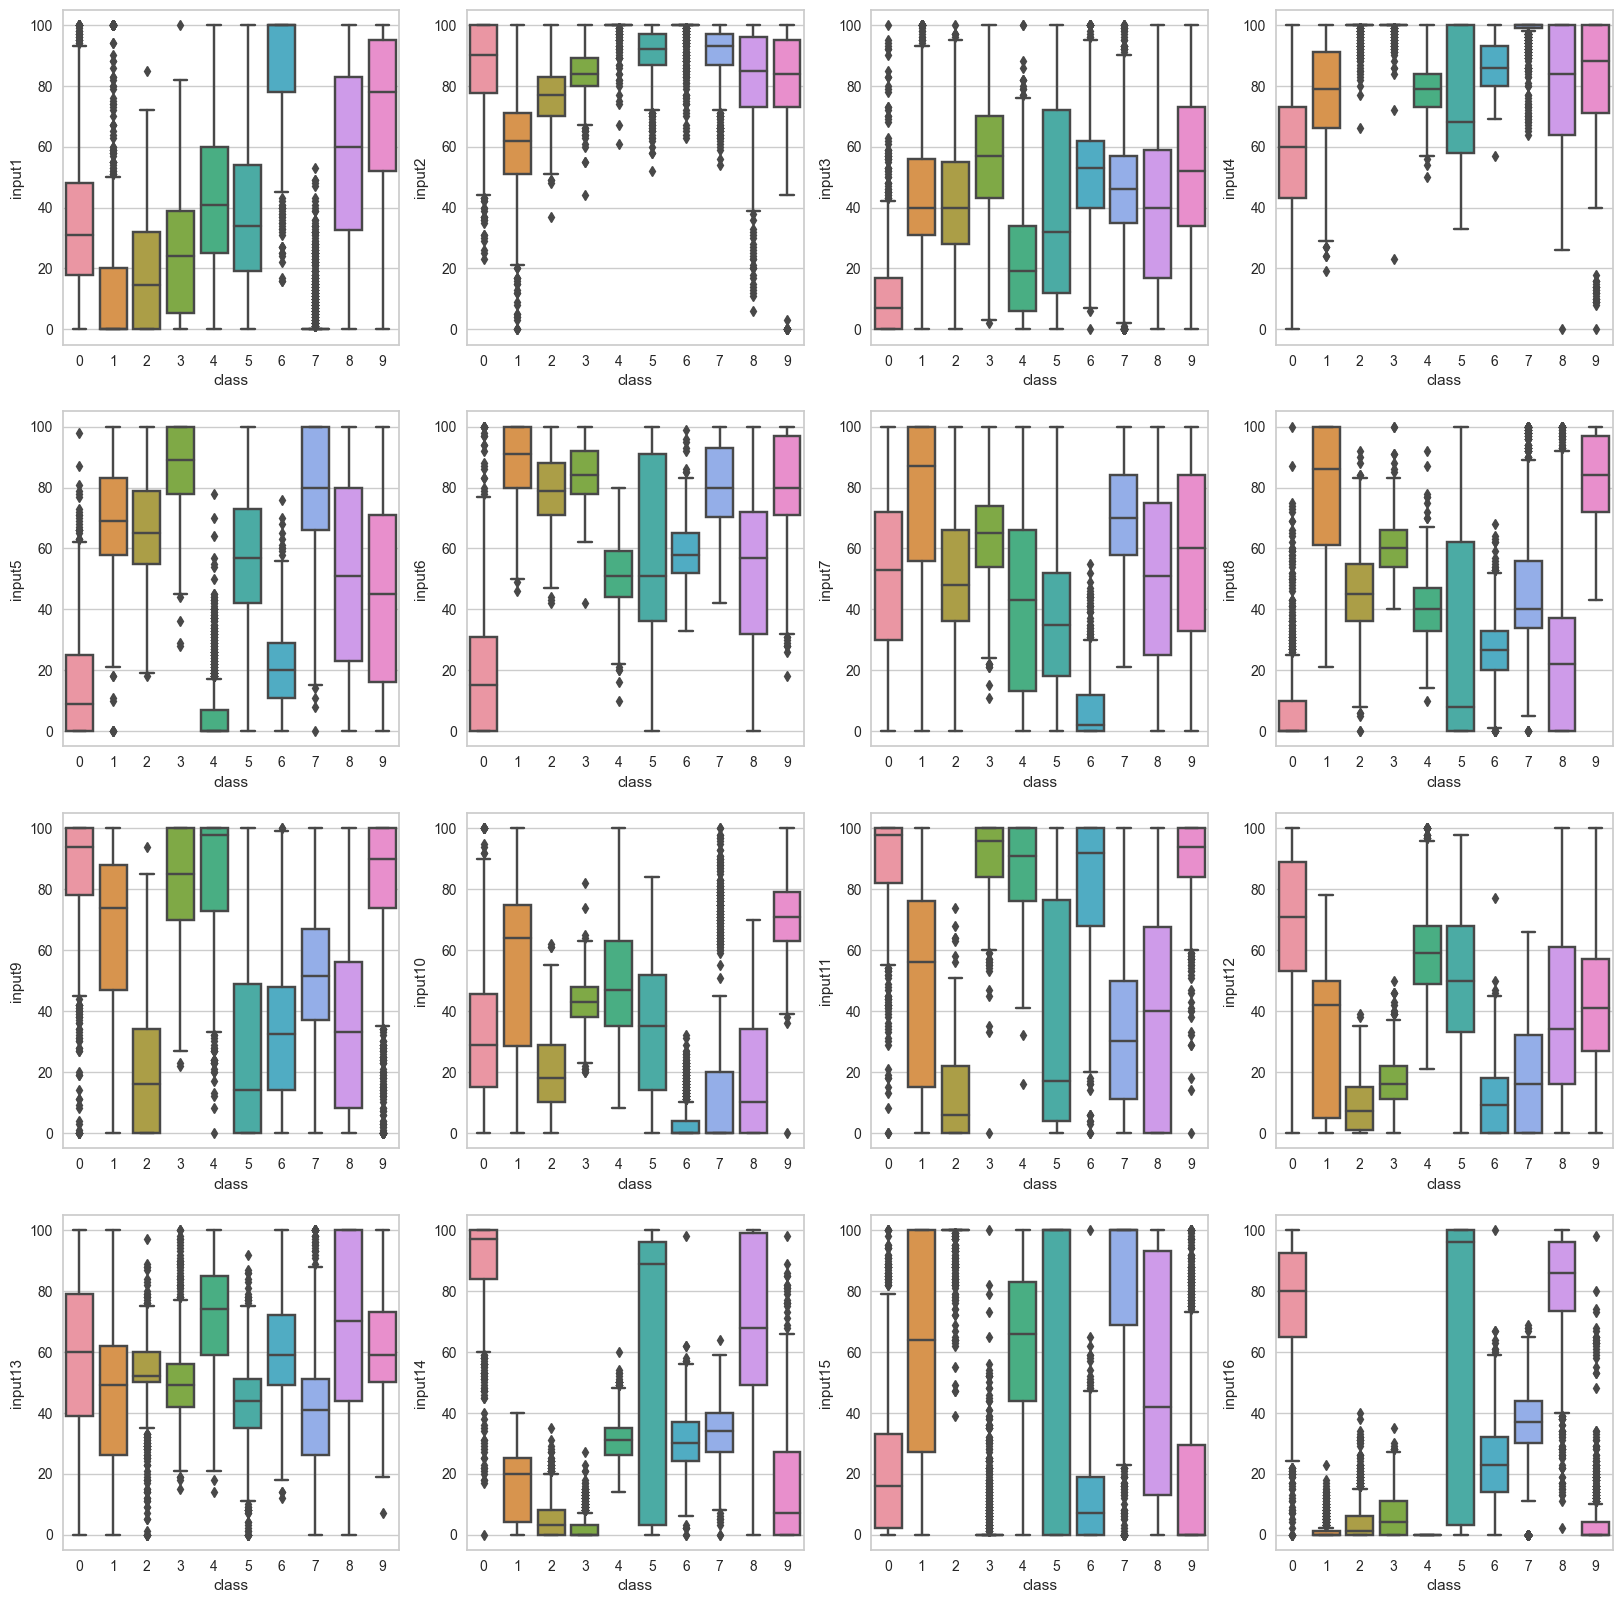

In [49]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "class":
        index += 1
        plt.subplot(4,4,index)
        sns.boxplot(x='class',y=feature,data=df)
plt.show()

# Decision Tree

## Train | Test Split

In [55]:
X = df.drop('class',axis=1)
y = df['class']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [57]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelling and Model Performance

In [23]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [19]:
dt_model = DecisionTreeClassifier(random_state=101)
dt_model.fit(X_train, y_train)
eval_metric(dt_model, X_train, y_train, X_test, y_test)

Test_Set
[[340   1   0   1   1   0   0   0   7   1]
 [  0 290  25   3   1   0   2   2   2   6]
 [  0  11 332   1   0   0   0   4   1   0]
 [  0   5   2 292   0   4   0   1   1   4]
 [  0   4   2   0 350   0   1   0   0   0]
 [  0   0   0   9   0 299   0   0   4   9]
 [  2   0   0   4   2   2 322   2   0   0]
 [  0   7   2   0   0   4   0 320   4   1]
 [  5   1   0   0   0   3   1   2 292   1]
 [  2   0   0   5   1   4   1   0   1 289]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       351
           1       0.91      0.88      0.89       331
           2       0.91      0.95      0.93       349
           3       0.93      0.94      0.94       309
           4       0.99      0.98      0.98       357
           5       0.95      0.93      0.94       321
           6       0.98      0.96      0.97       334
           7       0.97      0.95      0.96       338
           8       0.94      0.96      0.95       305
           9       

In [20]:
model = DecisionTreeClassifier(random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy           0.95945
test_precision_micro    0.95945
test_recall_micro       0.95945
test_f1_micro           0.95945
dtype: float64

### DT Model Feature Importance

In [21]:
dt_feature_imp = pd.DataFrame(index = X.columns, data = dt_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
dt_feature_imp

Feature Importance
input16            0.164380
input11            0.133117
input10            0.118517
input5             0.109876
input4             0.104342
input1             0.071177
input2             0.053177
input15            0.051306
input13            0.043744
input7             0.026915
input12            0.023408
input9             0.023129
input14            0.022520
input3             0.021090
input6             0.016688
input8             0.016617

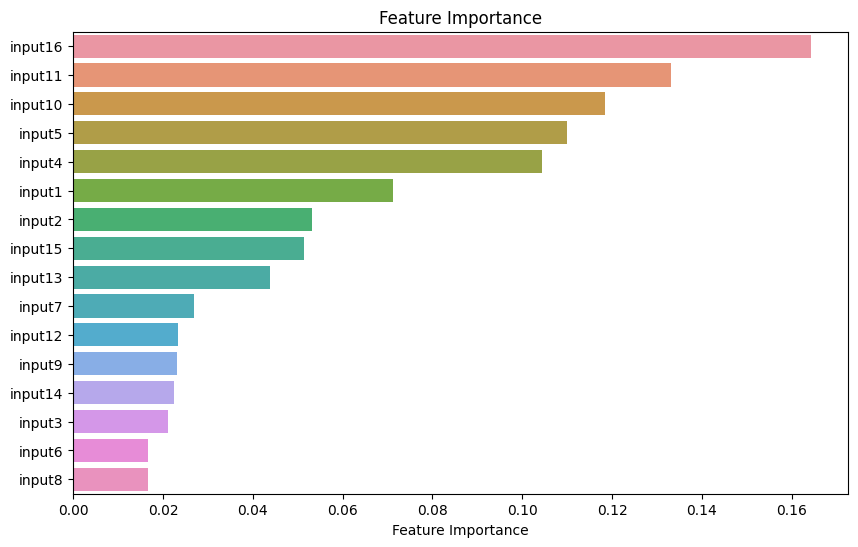

In [22]:
sns.barplot(x=dt_feature_imp["Feature Importance"], y=dt_feature_imp.index)
plt.title("Feature Importance")
plt.show()

In [28]:
param_grid = {"splitter":["best", "random"],
              "max_features":[None, 3, 5, 7],    #None= Butun feature' lari kullan
              "max_depth": [None, 4, 5, 6, 7, 8, 9, 10],
              "min_samples_leaf": [1, 2, 3, 5],
              "min_samples_split": [2, 3, 5, 7, 9, 15]}

In [29]:
model = DecisionTreeClassifier(class_weight = "balanced", random_state=101)
dt_grid_model = GridSearchCV(estimator=model,
                            param_grid=param_grid,
                            scoring='recall',
                            n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 1536 candidates, totalling 7680 fits


In [30]:
dt_grid_model.best_params_

{'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [31]:
eval_metric(dt_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[346   1   0   0   1   0   1   0   2   0]
 [  0 291  20   6   2   1   3   2   1   5]
 [  0  13 332   0   0   0   0   4   0   0]
 [  0   4   2 293   0   5   0   2   0   3]
 [  0   3   1   0 351   0   0   2   0   0]
 [  0   0   0   8   0 303   0   0   3   7]
 [  1   0   0   0   4   2 326   1   0   0]
 [  0   7   2   0   0   1   1 323   3   1]
 [  3   1   0   1   0   2   3   2 293   0]
 [  0   5   0   3   2   2   1   0   3 287]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       351
           1       0.90      0.88      0.89       331
           2       0.93      0.95      0.94       349
           3       0.94      0.95      0.95       309
           4       0.97      0.98      0.98       357
           5       0.96      0.94      0.95       321
           6       0.97      0.98      0.97       334
           7       0.96      0.96      0.96       338
           8       0.96      0.96      0.96       305
           9       

# Random Forest Classifier

In [24]:
rf_model = RandomForestClassifier(random_state=101)
rf_model.fit(X_train,y_train)
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[350   0   0   0   1   0   0   0   0   0]
 [  0 324   6   1   0   0   0   0   0   0]
 [  0   2 345   0   0   0   0   2   0   0]
 [  0   0   1 307   0   0   0   1   0   0]
 [  0   0   0   0 355   0   0   1   0   1]
 [  0   0   0   3   0 318   0   0   0   0]
 [  0   0   0   0   1   0 333   0   0   0]
 [  0   1   0   0   0   0   0 337   0   0]
 [  0   0   0   0   0   1   0   1 303   0]
 [  0   0   0   0   0   0   0   0   0 303]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       351
           1       0.99      0.98      0.98       331
           2       0.98      0.99      0.98       349
           3       0.99      0.99      0.99       309
           4       0.99      0.99      0.99       357
           5       1.00      0.99      0.99       321
           6       1.00      1.00      1.00       334
           7       0.99      1.00      0.99       338
           8       1.00      0.99      1.00       305
           9       

In [25]:
model = RandomForestClassifier(random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy           0.989474
test_precision_micro    0.989474
test_recall_micro       0.989474
test_f1_micro           0.989474
dtype: float64

## RF Model Feature Importance

In [26]:
rf_feature_imp = pd.DataFrame(index = X.columns, data = rf_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
rf_feature_imp

Feature Importance
input16            0.104913
input14            0.104744
input15            0.076305
input5             0.073375
input11            0.072942
input10            0.067460
input8             0.061565
input9             0.059767
input1             0.057819
input2             0.056559
input12            0.055800
input6             0.053127
input4             0.051600
input7             0.046593
input13            0.032080
input3             0.025352

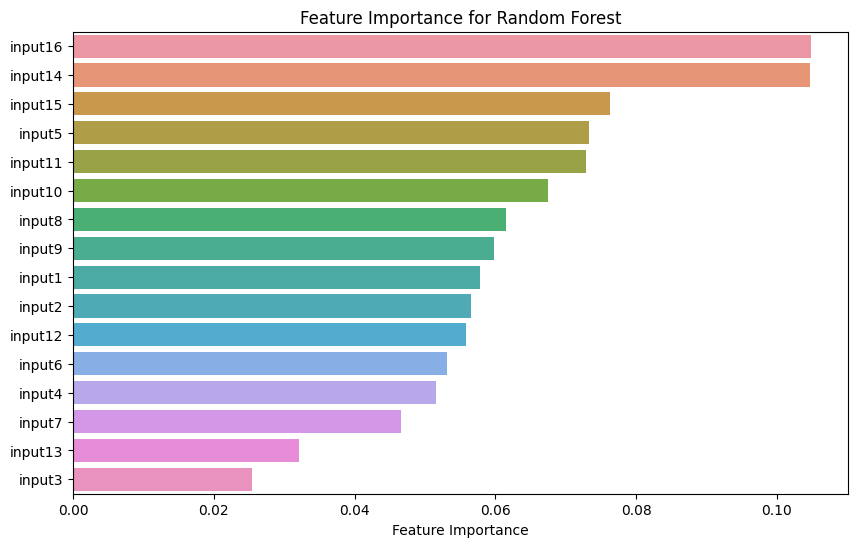

In [27]:
ax = sns.barplot(x=rf_feature_imp["Feature Importance"], y=rf_feature_imp.index)
plt.title("Feature Importance for Random Forest")
plt.show()

In [28]:
pd.concat([rf_feature_imp, dt_feature_imp], axis=1)

Feature Importance  Feature Importance
input16            0.104913            0.164380
input14            0.104744            0.022520
input15            0.076305            0.051306
input5             0.073375            0.109876
input11            0.072942            0.133117
input10            0.067460            0.118517
input8             0.061565            0.016617
input9             0.059767            0.023129
input1             0.057819            0.071177
input2             0.056559            0.053177
input12            0.055800            0.023408
input6             0.053127            0.016688
input4             0.051600            0.104342
input7             0.046593            0.026915
input13            0.032080            0.043744
input3             0.025352            0.021090

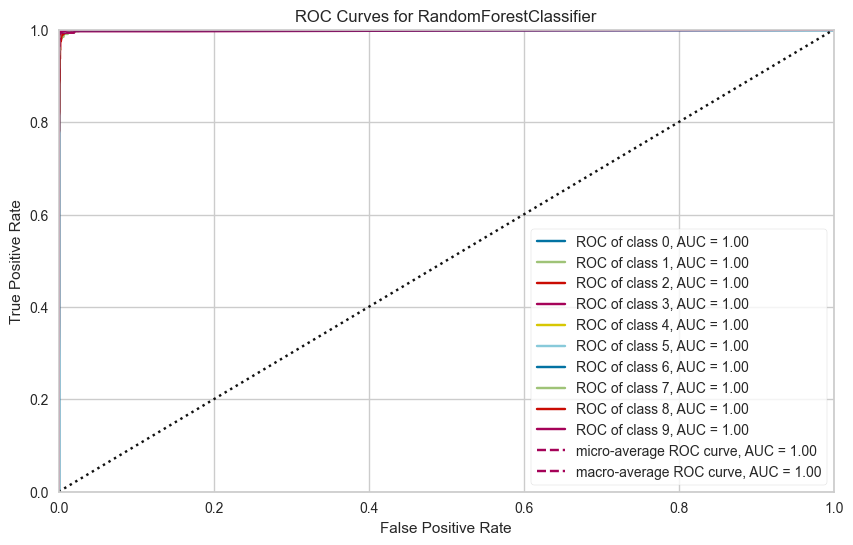

In [33]:
rf_model = RandomForestClassifier()
visualizer = ROCAUC(rf_model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();                       # Finalize and render the figure

In [38]:
param_grid = {'n_estimators':[64, 100, 128, 300, 500, 1000],     #64 ve 128 skorlarina mutlaka bakilmasi gerektigini belirtmistik.
             'max_features':[2, 3, 4, "auto"],
             'max_depth':[3, 5, 7, 9],
             'min_samples_split':[2, 5, 8]}

In [39]:
model = RandomForestClassifier(class_weight = "balanced", random_state=101)
rf_grid_model = GridSearchCV(model, param_grid, scoring = "accuracy", n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


In [40]:
rf_grid_model.best_params_

{'max_depth': 9,
 'max_features': 4,
 'min_samples_split': 2,
 'n_estimators': 300}

In [41]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[350   0   0   0   1   0   0   0   0   0]
 [  0 305  19   7   0   0   0   0   0   0]
 [  0   6 341   0   0   0   0   2   0   0]
 [  0   0   1 307   0   0   0   1   0   0]
 [  0   0   0   0 355   0   0   1   0   1]
 [  0   0   0   5   0 316   0   0   0   0]
 [  0   0   0   0   1   0 333   0   0   0]
 [  0   2   0   0   0   0   0 335   1   0]
 [  0   0   0   0   0   1   0   1 303   0]
 [  0   0   0   0   1   0   0   0   0 302]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       351
           1       0.97      0.92      0.95       331
           2       0.94      0.98      0.96       349
           3       0.96      0.99      0.98       309
           4       0.99      0.99      0.99       357
           5       1.00      0.98      0.99       321
           6       1.00      1.00      1.00       334
           7       0.99      0.99      0.99       338
           8       1.00      0.99      1.00       305
           9       

# Support Vector Machine (SVM) Classifier

In [18]:
svm = SVC(probability=True)
param_grid = {'C':[0.01,0.1,1,10,1000],
              'kernel':['linear','rbf','sigmoid','poly'],
              'gamma':["scale", "auto"],
              'degree':[1,2]}
grid = GridSearchCV(svm,param_grid)

In [19]:
grid.fit(X_train_scaled,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.1, 1, 10, 1000], 'degree': [1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']})

In [20]:
grid.best_score_

0.9950613059161413

In [21]:
grid.best_params_

{'C': 10, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}

In [26]:
eval_metric(grid, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[350   0   0   0   0   0   1   0   0   0]
 [  0 328   1   1   0   0   0   1   0   0]
 [  0   1 348   0   0   0   0   0   0   0]
 [  0   0   1 307   0   0   0   1   0   0]
 [  0   0   0   0 357   0   0   0   0   0]
 [  0   0   0   1   0 319   0   0   0   1]
 [  0   0   0   0   0   0 334   0   0   0]
 [  0   2   0   0   0   0   0 336   0   0]
 [  1   0   0   0   0   1   0   1 302   0]
 [  0   0   0   0   0   0   0   0   0 303]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       351
           1       0.99      0.99      0.99       331
           2       0.99      1.00      1.00       349
           3       0.99      0.99      0.99       309
           4       1.00      1.00      1.00       357
           5       1.00      0.99      1.00       321
           6       1.00      1.00      1.00       334
           7       0.99      0.99      0.99       338
           8       1.00      0.99      1.00       305
           9       

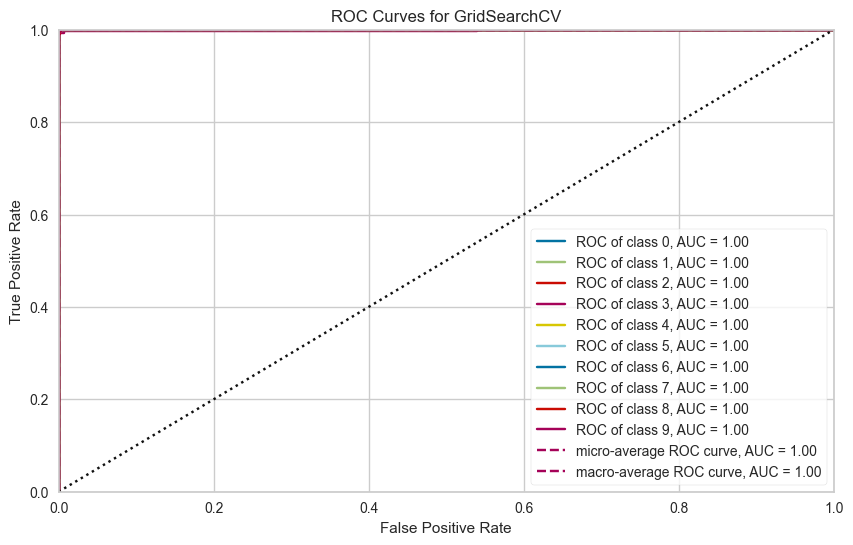

In [27]:
visualizer = ROCAUC(grid)

visualizer.fit(X_train_scaled, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)        # Evaluate the model on the test data
visualizer.show();

#  CONCLUSION

Random forest algoritması SVM ye göre daha hızlı çalışır ve Feature importance açısından fayda sağlar. Fakat confusion matrixler karşılaştırıldığında Random Forest ta SVM ye oranla çok fazla hata çıkmıştır ve hyper parametrelerle alınan sonuçlarda SVM skorları daha başarılı bulunmuştur. 

Sonuç olarak data balance data olduğundan ve veri seti de çok büyük olmadığından SVM algoritması tercih edilebilir